In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/Users/siyi/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## 1. baseline_demographics.csv
1. one-hot encoding: gender, education, mariral_status, race
2. Ordinal label Encoding: income_statisfaction, income_lastyear
3. Keep the Brighten-v2
 

In [220]:
df_bd = pd.read_csv('data/baseline_demographics.csv')
df_bd

,Unnamed: 0,ROW_ID,ROW_VERSION,participant_id,gender,education,working,income_satisfaction,income_lastyear,marital_status,race,age,heard_about_us,device,startdate,study_arm,study
0,0,1,1,BLUE-00048,Male,Graduate Degree,Yes,NaN,NaN,Single,Asian,31.0,NaN,iPhone,2014-07-11 10:45:00,iPST,Brighten-v1
1,1,2,1,BLUE-00049,Male,Graduate Degree,No,NaN,NaN,Married/Partner,Asian,47.0,NaN,Android,2014-07-31 21:21:00,iPST,Brighten-v1
2,2,3,1,BLUE-00050,Male,High School,Yes,NaN,NaN,Separated/Widowed/Divorced,African-American/Black,55.0,NaN,iPhone,2014-08-02 10:46:00,iPST,Brighten-v1
3,3,4,1,BLUE-00051,Male,University,No,NaN,NaN,Separated/Widowed/Divorced,Non-Hispanic White,73.0,NaN,iPhone,2014-08-02 17:50:00,iPST,Brighten-v1
4,4,5,1,BLUE-00052,Male,University,No,NaN,NaN,Single,Non-Hispanic White,51.0,NaN,iPhone,2014-08-04 09:07:00,iPST,Brighten-v1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2173,2188,2189,2,YELLOW-00260,Male,University,Yes,Can't make ends meet,"< $20,000",Single,Non-Hispanic White,40.0,Craigslist,Android,2014-12-07 10:44:00,HealthTips,Brighten-v1
2174,2189,2190,2,YELLOW-00261,Female,Community College,No,Can't make ends meet,"40,000-60,000",Separated/Widowed/Divorced,Non-Hispanic White,47.0,Craigslist,Android,2014-12-05 18:07:00,HealthTips,Brighten-v1
2175,2190,2191,2,YELLOW-00262,Female,High School,Yes,Can't make ends meet,"< $20,000",Single,African-American/Black,20.0,friend/colleague,Android,2014-12-06 20:33:00,HealthTips,Brighten-v1
2176,2191,2192,2,YELLOW-00263,Female,High School,No,Can't make ends meet,"< $20,000",Single,Hispanic/Latino,23.0,Craigslist,Android,2014-12-07 01:12:00,HealthTips,Brighten-v1


<AxesSubplot:xlabel='education', ylabel='Count'>

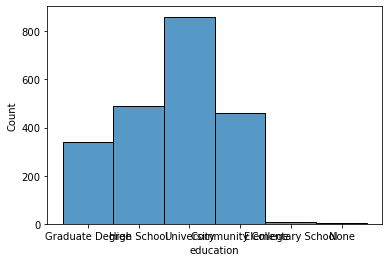

In [221]:
sns.histplot(data = df_bd, x = 'education')

<AxesSubplot:xlabel='income_satisfaction', ylabel='Count'>

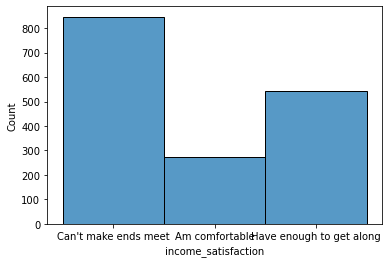

In [222]:
sns.histplot(data = df_bd, x = 'income_satisfaction')

<AxesSubplot:xlabel='marital_status', ylabel='Count'>

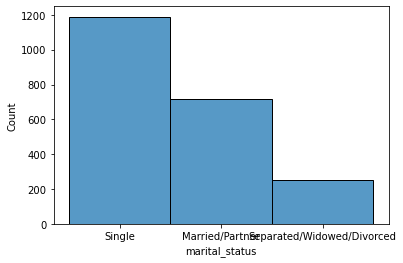

In [223]:
sns.histplot(data = df_bd, x = 'marital_status')

Non-Hispanic White                        1136
Hispanic/Latino                            552
African-American/Black                     220
Asian                                      148
More than one                               69
American Indian/Alaskan Native              20
Other                                        9
Native Hawaiian/other Pacific Islander       5
Name: race, dtype: int64

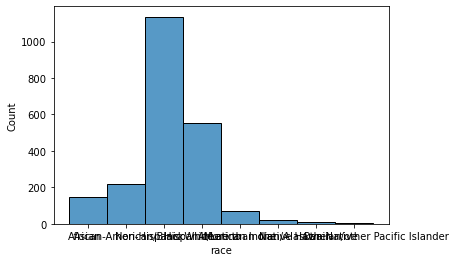

In [224]:
sns.histplot(data = df_bd, x = 'race')
df_bd['race'].value_counts()

In [225]:
df_bd.loc[df_bd['age'] == 1991,'age'] = 25 #deal with outlier: start_date - 1991
df_bd.drop(columns = ['Unnamed: 0', 'ROW_ID', 'ROW_VERSION'], inplace = True)
df_bd.drop(columns = ['heard_about_us', 'device', 'study_arm'], inplace = True)
df_bd.describe()

,age
count,2159.000000
mean,33.464104
std,11.112429
min,16.000000
25%,25.000000
50%,31.000000
75%,40.000000
max,76.000000


In [226]:
# df_bd['study'].value_counts()
# df_bd['income_satisfaction'].unique()
# df_bd['income_lastyear'].unique()
# df_bd['gender'].value_counts()
# df_bd['education'].unique()
df_bd['race'].unique()

array(['Asian', 'African-American/Black', 'Non-Hispanic White',
       'Hispanic/Latino', 'More than one',
       'American Indian/Alaskan Native', 'Other', nan,
       'Native Hawaiian/other Pacific Islander'], dtype=object)

In [227]:
satisfaction_dict = {'Can\'t make ends meet': 1,'Am comfortable': 2,'Have enough to get along': 3}
income_dict = {'< $20,000': 1,'40,000-60,000': 2,'20,000-40,000': 3, '60,000-80,000':4, '80,000-100,000':5, '100,000+':6}
working_dict = {'Yes':1, 'No':0}

df_bd["working"] = df_bd.working.map(working_dict) #nan
df_bd['income_satisfaction'] = df_bd.income_satisfaction.map(satisfaction_dict)
df_bd['income_lastyear'] = df_bd.income_lastyear.map(income_dict)

# pd.get_dummies(df_bd,columns=["gender"])
df_bd = pd.get_dummies(df_bd,prefix=["gen","martial","edu", 'race'],columns=["gender","marital_status", 'education', 'race'])

In [228]:
df_bd.columns

Index(['participant_id', 'working', 'income_satisfaction', 'income_lastyear',
       'age', 'startdate', 'study', 'gen_Female', 'gen_Male',
       'martial_Married/Partner', 'martial_Separated/Widowed/Divorced',
       'martial_Single', 'edu_Community College', 'edu_Elementary School',
       'edu_Graduate Degree', 'edu_High School', 'edu_None', 'edu_University',
       'race_African-American/Black', 'race_American Indian/Alaskan Native',
       'race_Asian', 'race_Hispanic/Latino', 'race_More than one',
       'race_Native Hawaiian/other Pacific Islander',
       'race_Non-Hispanic White', 'race_Other'],
      dtype='object')

In [229]:
df_bd = df_bd[df_bd['study'] == 'Brighten-v2']

In [231]:
participant_id_v2 = df_bd['participant_id']
participant_id_v2

213     EN00033
214     EN00034
215     EN00035
216     EN00036
217     EN00037
         ...   
1276    ES05078
1277    ES05079
1278    ES05080
1279    ES05081
1280    ES05082
Name: participant_id, Length: 1068, dtype: object

In [17]:
def fillna_mean(df):
    for col in df.columns:
        if df[col].isna().sum():
            df[col].fillna(value = df[col].mean(), inplace = True)
    return df

In [18]:

df_bd = fillna_mean(df_bd)
df_bd.to_csv('df_demographics.csv')

## 2.baseline_phq9_survey.csv
1. sum 9 phq to get the final score
2. level 1: 0-5, level 2: 6-10, level 3: 11-15, level 4: 16-20, level 4 20-25, level 5: >25

In [19]:
df_bp9 = pd.read_csv('data/baseline_phq9_survey.csv')
df_bp9

,Unnamed: 0,ROW_ID,ROW_VERSION,participant_id,phq9_1,phq9_2,phq9_3,phq9_4,phq9_5,phq9_6,phq9_7,phq9_8,phq9_9,study,baselinePHQ9date
0,0,1,1,BLUE-00048,1,2,2,2,1,2,1,0,0,Brighten-v1,2014-07-11
1,1,2,1,BLUE-00049,1,1,2,1,3,1,1,0,0,Brighten-v1,2014-07-31
2,2,3,1,BLUE-00050,2,1,2,2,0,2,2,0,0,Brighten-v1,2014-08-02
3,3,4,1,BLUE-00051,1,1,0,1,1,1,0,0,0,Brighten-v1,2014-08-02
4,4,5,1,BLUE-00052,2,2,3,3,2,3,2,0,0,Brighten-v1,2014-08-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,1914,1915,1,EN05162,0,1,1,1,1,2,2,1,2,Brighten-v2,2016-10-15
1900,1915,1916,1,EN05149,0,1,1,1,1,1,1,1,0,Brighten-v2,2016-10-03
1901,1916,1917,1,EN00342,1,1,1,1,0,1,1,1,0,Brighten-v2,2016-09-08
1902,1917,1918,1,EN05241,2,1,3,3,2,2,1,0,0,Brighten-v2,2016-11-29


In [20]:
df_bp9.drop(columns = ['Unnamed: 0', 'ROW_ID', 'ROW_VERSION'], inplace = True)
df_bp9.describe()

,phq9_1,phq9_2,phq9_3,phq9_4,phq9_5,phq9_6,phq9_7,phq9_8,phq9_9
count,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000
mean,1.705882,1.723214,2.070903,2.004202,1.719538,1.835609,1.640231,0.980042,0.458508
std,0.822469,0.847591,0.913905,0.835990,0.967749,0.935533,0.949751,0.960940,0.753594
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
50%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000
75%,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,1.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000


In [21]:
def sum_phq9(df):
    cols = ['phq9_1','phq9_2','phq9_3', 'phq9_4', 'phq9_5', 'phq9_6','phq9_7','phq9_8','phq9_9']
    df['phq9_sum'] = df[cols].sum(axis = 1)
    return df

def score_to_5level(df):
    bins = [-1, 5, 10, 15, 20, np.inf]
    names = ['1', '2', '3', '4', '5']
    df['phq9_level'] = pd.cut(df['phq9_sum'], bins, labels=names)
    df['phq9_level'].replace(names,
                        [1, 2,3, 4, 5], inplace=True)

    return df

In [22]:
df_bp9 = sum_phq9(df_bp9)
df_bp9 = score_to_5level(df_bp9)
df_bp9 = df_bp9[df_bp9['study'] == 'Brighten-v2']

df_bp9

,participant_id,phq9_1,phq9_2,phq9_3,phq9_4,phq9_5,phq9_6,phq9_7,phq9_8,phq9_9,study,baselinePHQ9date,phq9_sum,phq9_level
957,EN00573,3,3,2,3,3,2,2,2,1,Brighten-v2,2016-11-13,21,5
958,EN05114,2,1,3,0,2,3,0,2,0,Brighten-v2,2016-09-04,13,3
959,EN00115,1,2,1,1,1,1,2,1,0,Brighten-v2,2016-08-29,10,2
960,EN00387,2,2,2,2,1,1,1,2,0,Brighten-v2,2016-10-25,13,3
961,EN05143,2,2,2,3,2,2,1,0,0,Brighten-v2,2016-09-19,14,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,EN05162,0,1,1,1,1,2,2,1,2,Brighten-v2,2016-10-15,11,3
1900,EN05149,0,1,1,1,1,1,1,1,0,Brighten-v2,2016-10-03,7,2
1901,EN00342,1,1,1,1,0,1,1,1,0,Brighten-v2,2016-09-08,7,2
1902,EN05241,2,1,3,3,2,2,1,0,0,Brighten-v2,2016-11-29,14,3


In [23]:
df_bp9.describe()

,phq9_1,phq9_2,phq9_3,phq9_4,phq9_5,phq9_6,phq9_7,phq9_8,phq9_9,phq9_sum,phq9_level
count,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000
mean,1.690602,1.723337,2.053854,2.009504,1.722281,1.845829,1.680042,1.031679,0.529039,14.286167,3.254488
std,0.829138,0.853741,0.912825,0.832045,0.946765,0.917006,0.946817,0.968341,0.814737,5.442322,1.085980
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,10.000000,2.000000
50%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,14.000000,3.000000
75%,2.000000,2.000000,3.000000,3.000000,2.000000,3.000000,2.000000,2.000000,1.000000,18.000000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,27.000000,5.000000


In [24]:
df_bp9 = df_bp9.add_prefix('base_')
df_bp9 =df_bp9.rename(columns={"base_participant_id": "participant_id", "base_study": "study"})
df_bp9

,participant_id,base_phq9_1,base_phq9_2,base_phq9_3,base_phq9_4,base_phq9_5,base_phq9_6,base_phq9_7,base_phq9_8,base_phq9_9,study,base_baselinePHQ9date,base_phq9_sum,base_phq9_level
957,EN00573,3,3,2,3,3,2,2,2,1,Brighten-v2,2016-11-13,21,5
958,EN05114,2,1,3,0,2,3,0,2,0,Brighten-v2,2016-09-04,13,3
959,EN00115,1,2,1,1,1,1,2,1,0,Brighten-v2,2016-08-29,10,2
960,EN00387,2,2,2,2,1,1,1,2,0,Brighten-v2,2016-10-25,13,3
961,EN05143,2,2,2,3,2,2,1,0,0,Brighten-v2,2016-09-19,14,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,EN05162,0,1,1,1,1,2,2,1,2,Brighten-v2,2016-10-15,11,3
1900,EN05149,0,1,1,1,1,1,1,1,0,Brighten-v2,2016-10-03,7,2
1901,EN00342,1,1,1,1,0,1,1,1,0,Brighten-v2,2016-09-08,7,2
1902,EN05241,2,1,3,3,2,2,1,0,0,Brighten-v2,2016-11-29,14,3


<AxesSubplot:xlabel='base_phq9_sum', ylabel='Count'>

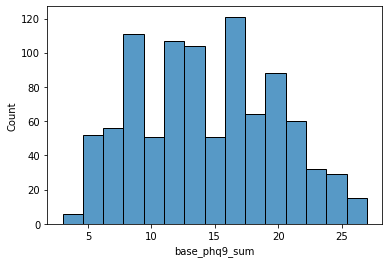

In [25]:
sns.histplot(data=df_bp9, x="base_phq9_sum")

<AxesSubplot:xlabel='base_phq9_level', ylabel='Count'>

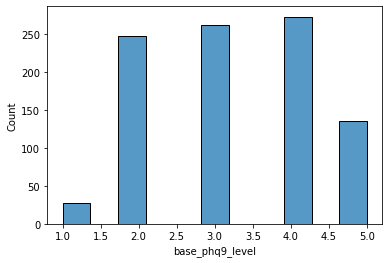

In [26]:
sns.histplot(data=df_bp9, x="base_phq9_level")

In [27]:
df_bp9.to_csv('df_baseline_phq9.csv')

## 3. phq9.csv
1. some participants take several phq9 tests within a week. does not matter, we take them daily.
2. Maximum 12 weeks

In [4]:
df_p9 = pd.read_csv('original_data/phq9.csv')
df_p9.describe()

,Unnamed: 0,ROW_ID,ROW_VERSION,week,sum_phq9,phq9_1,phq9_2,phq9_3,phq9_4,phq9_5,phq9_6,phq9_7,phq9_8,phq9_9
count,4817.000000,4817.000000,4817.000000,4817.000000,4817.000000,4817.000000,4816.000000,4814.000000,4814.000000,4814.000000,4813.000000,4811.000000,4810.000000,4809.000000
mean,2414.748599,2415.748599,1.444675,5.166286,9.541831,1.172929,1.234842,1.406938,1.514749,1.179684,1.070434,1.035544,0.480873,0.371387
std,1400.527571,1400.527571,0.496981,3.475107,5.808614,0.803200,0.828791,1.010007,0.932642,1.015931,0.964361,0.938540,0.780925,0.726361
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1204.000000,1205.000000,1.000000,2.000000,5.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2408.000000,2409.000000,1.000000,4.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
75%,3612.000000,3613.000000,2.000000,8.000000,13.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000
max,4874.000000,4875.000000,2.000000,12.000000,27.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000


In [343]:
df_p9['participant_id'].nunique()

923

In [11]:
df_p9_date = df_p9[['phq9Date','participant_id','week']].drop_duplicates(subset=['participant_id', 'week'], keep='last')


,phq9Date,participant_id,week
0,2014-08-08,BLUE-00048,1
1,2014-08-23,BLUE-00050,2
2,2014-08-30,BLUE-00050,3
3,2014-09-08,BLUE-00050,4
4,2014-09-22,BLUE-00050,6
...,...,...,...
4812,2016-09-30,EN00155,5
4813,2016-12-11,ES00027,9
4814,2016-11-28,EN00554,3
4815,2016-09-21,EN00225,3


In [345]:
df_p9.drop(columns = ['Unnamed: 0', 'ROW_ID', 'ROW_VERSION'], inplace = True)
df_p9 = sum_phq9(df_p9) 
# df_p9 = df_p9.groupby(['participant_id','week']).mean().reset_index() #use avg score to present this week
df_p9 = score_to_5level(df_p9)


[Text(0.5, 1.0, 'overall level change')]

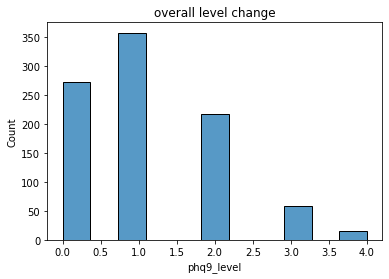

In [346]:
df_level_diff = (df_p9.groupby(['participant_id'])['phq9_level'].max() - df_p9.groupby(['participant_id'])['phq9_level'].min()).reset_index().sort_values(['phq9_level'])
df_level_diff
sns.histplot(data=df_level_diff, x="phq9_level").set(title='overall level change')


[Text(0.5, 1.0, 'level change weekly')]

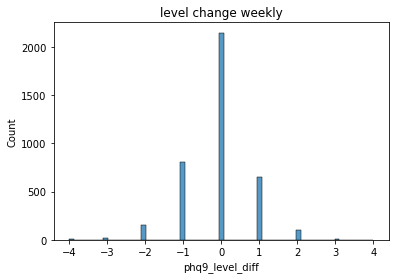

In [347]:
df_p9['phq9_level_diff'] = df_p9.groupby(['participant_id'])['phq9_level'].diff().reset_index()['phq9_level']
df_p9['phq9_sum_diff'] = df_p9.groupby(['participant_id'])['phq9_sum'].diff().reset_index()['phq9_sum']
sns.histplot(data=df_p9, x="phq9_level_diff").set(title='level change weekly')

In [348]:
df_p9_date[df_p9_date['participant_id'] == 'YELLOW-00263']
df_p9[df_p9['sum_phq9'] != df_p9['phq9_sum']]
(df_p9['sum_phq9'] - df_p9['phq9_sum']).value_counts()

 0.0    3013
 1.0     812
-1.0     645
 2.0     172
-2.0     103
 3.0      50
-3.0      22
dtype: int64

In [349]:
df_p9=df_p9.merge(df_p9_date, how = 'inner')
df_p9

,participant_id,week,sum_phq9,phq9Date,phq9_1,phq9_2,phq9_3,phq9_4,phq9_5,phq9_6,phq9_7,phq9_8,phq9_9,phq9_sum,phq9_level,phq9_level_diff,phq9_sum_diff
0,BLUE-00048,1,7,2014-08-08,0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,5.0,1,NaN,NaN
1,BLUE-00050,2,7,2014-08-23,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,7.0,2,NaN,NaN
2,BLUE-00050,3,4,2014-08-30,1,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,1,-1.0,-3.0
3,BLUE-00050,4,5,2014-09-08,1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,5.0,1,0.0,1.0
4,BLUE-00050,6,5,2014-09-22,1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,5.0,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4786,EN00155,5,10,2016-09-30,2,2.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,10.0,2,0.0,4.0
4787,ES00027,9,21,2016-12-11,3,1.0,3.0,3.0,3.0,2.0,2.0,3.0,1.0,21.0,5,0.0,0.0
4788,EN00554,3,14,2016-11-28,2,2.0,3.0,3.0,1.0,1.0,2.0,0.0,0.0,14.0,3,0.0,2.0
4789,EN00225,3,3,2016-09-21,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,1,0.0,0.0


<AxesSubplot:ylabel='Count'>

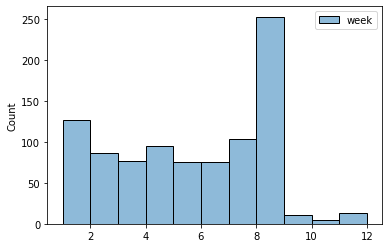

In [350]:
sns.histplot(df_p9.groupby(['participant_id'])['week'].count().reset_index())

In [351]:
df_p9[df_p9['participant_id'] == 'BLUE-00048'].sort_values(['week'])
# df_p9[df_p9['phq9_level'] == 0].sort_values(['week'])
# df_p9['phq9_level'].unique()
df_p9

,participant_id,week,sum_phq9,phq9Date,phq9_1,phq9_2,phq9_3,phq9_4,phq9_5,phq9_6,phq9_7,phq9_8,phq9_9,phq9_sum,phq9_level,phq9_level_diff,phq9_sum_diff
0,BLUE-00048,1,7,2014-08-08,0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,5.0,1,NaN,NaN
1,BLUE-00050,2,7,2014-08-23,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,7.0,2,NaN,NaN
2,BLUE-00050,3,4,2014-08-30,1,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,1,-1.0,-3.0
3,BLUE-00050,4,5,2014-09-08,1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,5.0,1,0.0,1.0
4,BLUE-00050,6,5,2014-09-22,1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,5.0,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4786,EN00155,5,10,2016-09-30,2,2.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,10.0,2,0.0,4.0
4787,ES00027,9,21,2016-12-11,3,1.0,3.0,3.0,3.0,2.0,2.0,3.0,1.0,21.0,5,0.0,0.0
4788,EN00554,3,14,2016-11-28,2,2.0,3.0,3.0,1.0,1.0,2.0,0.0,0.0,14.0,3,0.0,2.0
4789,EN00225,3,3,2016-09-21,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,1,0.0,0.0


In [13]:
phq_9 = pd.read_csv('data/df_phq9.csv')

In [17]:
phq_9.drop_duplicates(subset = ['participant_id','phq9Date'], keep = 'last', inplace = True)
phq_9.to_csv('data/df_phq9.csv')

In [354]:
df_p9_v2 = df_p9[df_p9['participant_id'].isin(participant_id_v2)]
(df_p9_v2['sum_phq9'] - df_p9_v2['phq9_sum']).value_counts()

0.0    1161
dtype: int64

In [352]:
# cols = ['phq9_1','phq9_2','phq9_3', 'phq9_4', 'phq9_5', 'phq9_6','phq9_7','phq9_8','phq9_9']
df = df_p9.merge(df_bp9, how = 'left', on = 'participant_id')

df

,participant_id,week,sum_phq9,phq9Date,phq9_1,phq9_2,phq9_3,phq9_4,phq9_5,phq9_6,...,base_phq9_4,base_phq9_5,base_phq9_6,base_phq9_7,base_phq9_8,base_phq9_9,study,base_baselinePHQ9date,base_phq9_sum,base_phq9_level
0,BLUE-00048,1,7,2014-08-08,0,1.0,1.0,2.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BLUE-00050,2,7,2014-08-23,1,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BLUE-00050,3,4,2014-08-30,1,0.0,1.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BLUE-00050,4,5,2014-09-08,1,1.0,1.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BLUE-00050,6,5,2014-09-22,1,1.0,1.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4786,EN00155,5,10,2016-09-30,2,2.0,2.0,1.0,1.0,0.0,...,3.0,3.0,2.0,3.0,2.0,0.0,Brighten-v2,2016-08-30,21.0,5.0
4787,ES00027,9,21,2016-12-11,3,1.0,3.0,3.0,3.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4788,EN00554,3,14,2016-11-28,2,2.0,3.0,3.0,1.0,1.0,...,3.0,2.0,2.0,3.0,2.0,0.0,Brighten-v2,2016-11-12,19.0,4.0
4789,EN00225,3,3,2016-09-21,1,1.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,Brighten-v2,2016-08-31,7.0,2.0


In [54]:
df.dropna(subset =['study','base_baselinePHQ9date'],inplace = True)
df = df.merge(df_bd,how = 'left', on = 'participant_id')

In [57]:
df.to_csv('demographics_phq9.csv')

In [56]:
df['participant_id']

0       EN00194
1       EN00083
2       EN00393
3       EN05219
4       EN00678
         ...   
1084    EN00328
1085    EN00155
1086    EN00554
1087    EN00225
1088    EN00091
Name: participant_id, Length: 1089, dtype: object

## 4. passive_phone_communication_features_brighten_v2.csv
1. the **callCount_incoming** and **callCount_missed** and **callCount_outgoing** are all 0.


In [356]:
df_ppcf = pd.read_csv('data/passive_phone_communication_features_brighten_v2.csv')
df_ppcf = df_ppcf.iloc[:, 3:]
df_ppcf.describe()
# df_ppcf

,week,callDuration_incoming,callDuration_outgoing,callCount_incoming,callCount_missed,callCount_outgoing,textCount,textCount_received,textCount_sent,textLength_received,textLength_sent,uniqueNumbers_calls_incoming,uniqueNumbers_calls_missed,uniqueNumbers_calls_outgoing,uniqueNumbers_texts,uniqueNumbers_texts_received,uniqueNumbers_texts_sent
count,1905.000000,1905.000000,1905.000000,1905.0,1905.0,1905.0,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000
mean,8.192651,550.440420,951.199475,0.0,0.0,0.0,0.021522,19.431496,15.114961,1048.025197,811.848819,1.288714,1.227297,2.582152,0.020997,3.316535,2.485564
std,6.146338,1162.141875,1603.032719,0.0,0.0,0.0,0.152220,31.309509,25.725643,1776.511076,1503.688401,1.667977,2.095987,2.951231,0.147030,2.707961,2.533168
min,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,2.000000,0.000000,127.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,7.000000,45.000000,253.000000,0.0,0.0,0.0,0.000000,8.000000,5.000000,445.000000,250.000000,1.000000,0.000000,2.000000,0.000000,3.000000,2.000000
75%,12.000000,574.000000,1230.000000,0.0,0.0,0.0,0.000000,22.000000,19.000000,1119.000000,979.000000,2.000000,1.000000,4.000000,0.000000,5.000000,4.000000
max,28.000000,12041.000000,13341.000000,0.0,0.0,0.0,2.000000,271.000000,264.000000,14748.000000,19263.000000,14.000000,15.000000,23.000000,2.000000,18.000000,20.000000


In [59]:
df_ppcf.drop(columns = ['callCount_incoming', 'callCount_missed','callCount_outgoing'], inplace = True)
df_ppcf = df_ppcf.rename(columns = {'dt_passive':'date'})

In [61]:
df_ppcf.to_csv('df_passive_phone_communication_features_brighten_v2.csv')

In [39]:
df_ppcf[df_ppcf['week'] == 28]
df_ppcf[df_ppcf['callDuration_incoming'] > 574]
df_ppcf['uniqueNumbers_texts'].unique()
df_ppcf['uniqueNumbers_texts_received'].value_counts()
# df_ppcf['uniqueNumbers_calls_incoming'].value_counts()

1     345
2     294
3     276
0     241
4     198
5     153
6     141
7      99
8      74
9      36
10     20
11     14
12      4
13      4
14      3
15      1
16      1
18      1
Name: uniqueNumbers_texts_received, dtype: int64

<AxesSubplot:xlabel='uniqueNumbers_texts_received', ylabel='Count'>

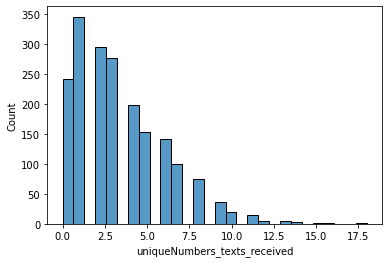

In [38]:
sns.histplot(data = df_ppcf, x='uniqueNumbers_texts_received')
# df_pmfb['dt_passive'].describe()

In [492]:
df_pmfb['ROW_VERSION'].unique()

array([58, 59, 60, 61, 62, 63, 64, 65, 66])

In [34]:
df_g7 = pd.read_csv('gad7.csv') #anxiety
df_g7


,Unnamed: 0,ROW_ID,ROW_VERSION,participant_id,dt_response,week,gad7_1,gad7_2,gad7_3,gad7_4,gad7_5,gad7_6,gad7_7,gad7_8,gad7_sum
0,0,4100,9,BLUE-00048,2014-08-01 10:59:30+00:00,3,1,0,1,1,0,0,0,0,3
1,1,4101,9,BLUE-00049,2014-08-01 16:31:13+00:00,1,1,0,1,1,0,1,1,1,6
2,2,4102,9,BLUE-00050,2014-08-09 02:30:10+00:00,1,1,1,1,1,1,1,1,0,7
3,3,4103,9,BLUE-00051,2014-08-05 17:34:20+00:00,1,1,1,1,1,1,1,0,1,7
4,4,4104,9,BLUE-00052,2014-08-04 21:27:28+00:00,0,3,3,3,3,3,3,3,3,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
814,815,4915,9,EN05331,2017-01-22 23:03:53+00:00,1,1,1,1,2,0,2,0,1,8
815,816,4916,9,EN05024,2016-09-03 21:10:38+00:00,2,2,3,0,3,0,1,2,0,11
816,817,4917,9,EN00322,2016-09-07 21:32:20+00:00,1,3,3,2,1,0,1,2,2,14
817,818,4918,9,EN05188,2016-11-10 03:25:51+00:00,1,3,3,1,1,3,1,1,1,14


In [65]:
print('unique week:',df_g7['week'].unique())

unique week: [ 3  1  0  2  4  6 14  8 11 10  5]


In [76]:
# df_g7.groupby(['participant_id'])['week'].nunique().unique()
df_g7.drop_duplicates(subset=['participant_id', 'week'],
                     keep='first', inplace=False)
# df_g7                

,Unnamed: 0,ROW_ID,ROW_VERSION,participant_id,dt_response,week,gad7_1,gad7_2,gad7_3,gad7_4,gad7_5,gad7_6,gad7_7,gad7_8,gad7_sum
0,0,4100,9,BLUE-00048,2014-08-01 10:59:30+00:00,3,1,0,1,1,0,0,0,0,3
1,1,4101,9,BLUE-00049,2014-08-01 16:31:13+00:00,1,1,0,1,1,0,1,1,1,6
2,2,4102,9,BLUE-00050,2014-08-09 02:30:10+00:00,1,1,1,1,1,1,1,1,0,7
3,3,4103,9,BLUE-00051,2014-08-05 17:34:20+00:00,1,1,1,1,1,1,1,0,1,7
4,4,4104,9,BLUE-00052,2014-08-04 21:27:28+00:00,0,3,3,3,3,3,3,3,3,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
814,815,4915,9,EN05331,2017-01-22 23:03:53+00:00,1,1,1,1,2,0,2,0,1,8
815,816,4916,9,EN05024,2016-09-03 21:10:38+00:00,2,2,3,0,3,0,1,2,0,11
816,817,4917,9,EN00322,2016-09-07 21:32:20+00:00,1,3,3,2,1,0,1,2,2,14
817,818,4918,9,EN05188,2016-11-10 03:25:51+00:00,1,3,3,1,1,3,1,1,1,14


In [10]:
df_ld = pd.read_csv('location_duration.csv') #

In [39]:
df_ld

,Unnamed: 0,Unnamed: 0.1,participant_id,date,category,duration
0,0,0,EN00033,2016-08-13,home,5699.0
1,1,1,EN00033,2016-08-13,none,23460.0
2,2,2,EN00033,2016-08-14,home,63239.0
3,3,3,EN00033,2016-08-14,none,0.0
4,4,4,EN00033,2016-08-15,home,44220.0
...,...,...,...,...,...,...
32027,34249,34249,ES05073,2017-03-20,home,360.0
32028,34250,34250,ES05073,2017-03-20,none,2220.0
32029,34251,34251,ES05073,2017-03-21,none,0.0
32030,34252,34252,ES05073,2017-03-22,home,26160.0


In [22]:
df_pce = pd.read_csv('Brigthen/passive_cluster_entries_brighten_v2.csv')

In [13]:
df_pce

NameError: name 'df_pce' is not defined

In [29]:
df_pce['subcategories'].unique()

array(['home', 'none', 'work', 'university', 'other',
       'real_estate_agency', 'dining_out', 'park', 'gym', 'church',
       'beauty_salon', 'health', 'furniture_store', 'clothing_store',
       'supermarket', 'department_store', 'atm', 'home_goods_store',
       'hardware_store', 'travel_agency', 'lodging', 'bar', 'school',
       'car_repair', 'bank', 'cafe', 'bakery',
       'beer_and_wine, sandwiches', 'liquor_store', 'transit_station',
       'lawyer', 'shoe_store', 'donuts, coffee', 'finance', 'store',
       'mosque', 'general_contractor', 'grocery_or_supermarket', 'spa',
       'accounting', 'museum', 'meal_takeaway', 'movie_theater', 'food',
       'book_store', 'laundry', 'shopping_mall', 'seafood, steak',
       'airport', 'moving_company', 'local_government_office',
       'veterinary_care', 'dentist', 'hair_care', 'jewelry_store',
       'hospital', 'electronics_store', 'meal_delivery', 'pizza',
       'gas_station', 'electrician', 'pet_store', 'cemetery',
       'car_

In [28]:
df_pce

,Unnamed: 0,ROW_ID,ROW_VERSION,participant_id,week,cid,category,subcategories,time_in,time_out
0,0,1106943,459,EN00033,0,home,home,home,2016-08-13 08:23:00,2016-08-13 09:34:00
1,1,1106944,459,EN00033,0,xNot,none,none,2016-08-13 15:51:00,2016-08-13 22:22:00
2,2,1106945,459,EN00033,0,home,home,home,2016-08-13 23:36:00,2016-08-13 23:59:59
3,3,1106946,459,EN00033,0,home,home,home,2016-08-14 00:00:00,2016-08-14 15:04:00
4,4,1106947,459,EN00033,0,xNot,none,none,2016-08-14 19:43:00,2016-08-14 19:43:00
...,...,...,...,...,...,...,...,...,...,...
55855,59661,1166604,471,ES05073,8,home,home,home,2017-03-20 16:12:00,2017-03-20 16:18:00
55856,59662,1166605,471,ES05073,8,xNot,none,none,2017-03-21 16:05:00,2017-03-21 16:05:00
55857,59663,1166606,471,ES05073,8,home,home,home,2017-03-22 09:51:00,2017-03-22 17:07:00
55858,59664,1166607,471,ES05073,8,xNot,none,none,2017-03-22 20:44:00,2017-03-22 20:44:00


In [41]:
df_pmfb = pd.read_csv('Brigthen/passive_mobility_features_brighten_v2.csv')

In [90]:
df_pmfb

,Unnamed: 0,ROW_ID,ROW_VERSION,participant_id,dt_passive,cloud_cover_IQR,cloud_cover_mean,cloud_cover_median,cloud_cover_std,dew_point_IQR,...,dew_point_std,humidity_IQR,humidity_mean,humidity_median,humidity_std,precip_sum,temp_IQR,temp_mean,temp_median,temp_std
0,0,89743,68,EN00033,2016-08-13,0.12,0.09,0.00,0.13,2.02,...,1.06,0.27,0.69,0.67,0.13,0.00,14.48,87.93,88.45,6.63
1,1,89744,68,EN00033,2016-08-14,0.44,0.28,0.20,0.25,2.32,...,1.42,0.33,0.71,0.75,0.16,0.04,14.62,84.66,84.41,7.44
2,2,89745,68,EN00033,2016-08-15,0.71,0.36,0.22,0.35,2.54,...,1.43,0.32,0.77,0.81,0.16,0.51,16.34,80.30,77.27,8.20
3,3,89746,68,EN00033,2016-08-16,0.48,0.44,0.48,0.24,2.28,...,2.02,0.25,0.78,0.76,0.14,0.01,11.32,81.88,83.26,7.19
4,4,89747,68,EN00033,2016-08-17,0.31,0.45,0.49,0.23,0.74,...,0.72,0.32,0.75,0.78,0.17,0.49,12.69,81.10,81.12,7.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16859,18004,107747,77,ES05073,2017-03-17,0.06,0.03,0.00,0.05,8.26,...,4.22,0.47,0.65,0.71,0.23,0.00,20.31,56.10,57.46,11.34
16860,18005,107748,77,ES05073,2017-03-18,0.00,0.00,0.00,0.02,2.22,...,2.05,0.54,0.61,0.51,0.24,0.00,26.54,63.82,67.36,11.92
16861,18006,107749,77,ES05073,2017-03-20,0.11,0.08,0.00,0.15,2.62,...,2.44,0.38,0.67,0.73,0.20,0.00,17.80,61.70,62.55,10.42
16862,18007,107750,77,ES05073,2017-03-21,0.00,0.00,0.00,0.00,2.91,...,2.15,0.49,0.62,0.60,0.22,0.00,19.87,67.61,70.39,11.31


In [37]:
df_ppcfb = pd.read_csv('passive_phone_communication_features_brighten_v2.csv')

In [38]:
df_ppcfb

,Unnamed: 0,ROW_ID,ROW_VERSION,participant_id,dt_passive,week,callDuration_incoming,callDuration_outgoing,callCount_incoming,callCount_missed,...,textCount_received,textCount_sent,textLength_received,textLength_sent,uniqueNumbers_calls_incoming,uniqueNumbers_calls_missed,uniqueNumbers_calls_outgoing,uniqueNumbers_texts,uniqueNumbers_texts_received,uniqueNumbers_texts_sent
0,0,33846,22,EN00066,2016-08-24,1,0,0,0,0,...,53,32,2954,2278,0,2,0,0,6,4
1,1,33847,22,EN00066,2016-08-25,1,340,0,0,0,...,189,136,10979,10306,1,0,0,0,15,12
2,2,33848,22,EN00066,2016-08-26,1,0,326,0,0,...,247,151,14748,8056,0,5,3,0,11,8
3,3,33849,22,EN00066,2016-08-27,1,0,1681,0,0,...,251,193,12864,10158,0,1,3,0,13,12
4,4,33850,22,EN00066,2016-08-28,1,0,449,0,0,...,82,52,4019,3194,0,0,1,0,9,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1900,1954,35800,22,ES05060,2017-03-17,10,2065,3,0,0,...,0,0,0,0,1,1,2,0,0,0
1901,1955,35801,22,ES05060,2017-03-20,11,0,0,0,0,...,1,0,223,0,0,0,0,0,1,0
1902,1956,35802,22,ES05060,2017-03-21,11,763,88,0,0,...,0,0,0,0,1,1,1,0,0,0
1903,1957,35803,22,ES05060,2017-03-24,11,0,497,0,0,...,0,0,0,0,0,1,1,0,0,0


In [35]:
df_pwfb = pd.read_csv('passive_weather_features_brighten_v2.csv')
# real judge of just how "dry" or "humid" it will feel outside, look at the dew point instead of the RH. The higher the dew point, the muggier it will feel.

In [36]:
df_pwfb

,Unnamed: 0,ROW_ID,ROW_VERSION,participant_id,dt_passive,cloud_cover_IQR,cloud_cover_mean,cloud_cover_median,cloud_cover_std,dew_point_IQR,...,dew_point_std,humidity_IQR,humidity_mean,humidity_median,humidity_std,precip_sum,temp_IQR,temp_mean,temp_median,temp_std
0,0,89743,68,EN00033,2016-08-13,0.12,0.09,0.00,0.13,2.02,...,1.06,0.27,0.69,0.67,0.13,0.00,14.48,87.93,88.45,6.63
1,1,89744,68,EN00033,2016-08-14,0.44,0.28,0.20,0.25,2.32,...,1.42,0.33,0.71,0.75,0.16,0.04,14.62,84.66,84.41,7.44
2,2,89745,68,EN00033,2016-08-15,0.71,0.36,0.22,0.35,2.54,...,1.43,0.32,0.77,0.81,0.16,0.51,16.34,80.30,77.27,8.20
3,3,89746,68,EN00033,2016-08-16,0.48,0.44,0.48,0.24,2.28,...,2.02,0.25,0.78,0.76,0.14,0.01,11.32,81.88,83.26,7.19
4,4,89747,68,EN00033,2016-08-17,0.31,0.45,0.49,0.23,0.74,...,0.72,0.32,0.75,0.78,0.17,0.49,12.69,81.10,81.12,7.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16859,18004,107747,77,ES05073,2017-03-17,0.06,0.03,0.00,0.05,8.26,...,4.22,0.47,0.65,0.71,0.23,0.00,20.31,56.10,57.46,11.34
16860,18005,107748,77,ES05073,2017-03-18,0.00,0.00,0.00,0.02,2.22,...,2.05,0.54,0.61,0.51,0.24,0.00,26.54,63.82,67.36,11.92
16861,18006,107749,77,ES05073,2017-03-20,0.11,0.08,0.00,0.15,2.62,...,2.44,0.38,0.67,0.73,0.20,0.00,17.80,61.70,62.55,10.42
16862,18007,107750,77,ES05073,2017-03-21,0.00,0.00,0.00,0.00,2.91,...,2.15,0.49,0.62,0.60,0.22,0.00,19.87,67.61,70.39,11.31


## 5. phq2.csv

### Insights
1. some paticipants responsed to the phq2 questionnaire more than one time within a day
2. they submitted different questionnaire that published on different dates within a day
3. The short interval between several submissions should be a repeat submission, but the day for dt_reponse is different, strange
4. for version 2, there is only one submission for ['participant_id','day'], but i am not sure the daye of first day
5. dt_response is always one day late after the dt_yesterday


### Methods:
1. According to the questionnaire, "**Yesterday**, were you bothered by any of the following problems: feeling down, depressed, or hopeless", we use dt_yesterday to represent the day of the questionnaire.
2. if there are multiple submissions within a day we keep the last try

In [310]:
df_p2 = pd.read_csv('data/phq2.csv',parse_dates=['dt_response', 'dt_yesterday'])
df_p2 = df_p2.iloc[:, 3:]
df_p2

,participant_id,dt_response,week,dt_yesterday,day,phq2_1,phq2_2,phq2_sum
0,BLUE-00048,2014-08-01 19:27:42+00:00,3,2014-07-31,0,2.0,1.0,3.0
1,BLUE-00048,2014-08-02 15:13:09+00:00,4,2014-08-01,1,3.0,3.0,6.0
2,BLUE-00048,2014-08-04 03:58:23+00:00,4,2014-08-03,2,1.0,1.0,2.0
3,BLUE-00048,2014-08-04 16:53:04+00:00,4,2014-08-03,3,2.0,2.0,4.0
4,BLUE-00048,2014-08-07 14:25:30+00:00,4,2014-08-06,6,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...
47452,EN00127,2016-09-21 18:23:08+00:00,4,2016-09-20,10,2.0,1.0,3.0
47453,EN00561,2017-02-02 12:41:10+00:00,12,2017-02-01,81,2.0,2.0,4.0
47454,EN00620,2017-01-04 22:53:33+00:00,8,2017-01-03,50,1.0,1.0,2.0
47455,EN00588,2016-12-15 03:58:53+00:00,5,2016-12-14,32,3.0,2.0,5.0


Text(0.5, 1.0, 'reponse hour in a day')

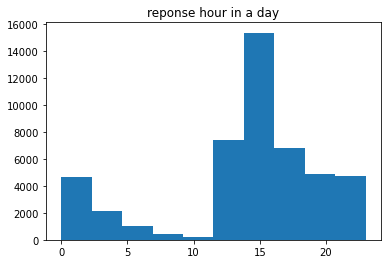

In [311]:
response_hour = df_p2['dt_response'].apply(lambda ts: ts.hour)
plt.hist(x = response_hour)
plt.title('reponse hour in a day')


<AxesSubplot:xlabel='phq2_sum', ylabel='Count'>

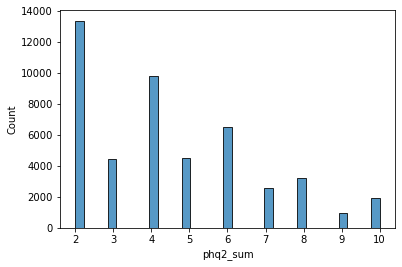

In [355]:
sns.histplot(data = df_p2, x = 'phq2_sum')

In [312]:
df_p2['dt_yesterday'] = df_p2['dt_yesterday'].apply(lambda ts: ts.date())
#df_p2['dt_response_date'] = df_p2['dt_response'].apply(lambda ts: ts.date() if ts.hour < 20 else ts.round(freq = 'D').date())

In [326]:
df_p2.sort_values(by = ['participant_id','dt_response'], ascending= True, inplace = True)
df_p2

,participant_id,dt_response,week,dt_yesterday,day,phq2_1,phq2_2,phq2_sum
0,BLUE-00048,2014-08-01 19:27:42+00:00,3,2014-07-31,0,2.0,1.0,3.0
1,BLUE-00048,2014-08-02 15:13:09+00:00,4,2014-08-01,1,3.0,3.0,6.0
2,BLUE-00048,2014-08-04 03:58:23+00:00,4,2014-08-03,2,1.0,1.0,2.0
3,BLUE-00048,2014-08-04 16:53:04+00:00,4,2014-08-03,3,2.0,2.0,4.0
4,BLUE-00048,2014-08-07 14:25:30+00:00,4,2014-08-06,6,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...
38951,YELLOW-00263,2015-01-14 13:32:41+00:00,6,2015-01-13,35,3.0,3.0,6.0
38952,YELLOW-00263,2015-01-15 13:34:15+00:00,6,2015-01-14,36,4.0,4.0,8.0
38953,YELLOW-00263,2015-01-16 13:25:21+00:00,6,2015-01-15,37,5.0,5.0,10.0
38954,YELLOW-00263,2015-01-17 19:37:01+00:00,6,2015-01-16,38,5.0,5.0,10.0


In [ ]:
# df_reponse_time = df_p2.groupby(['dt_yesterday', 'participant_id'])['dt_response_date'].count().reset_index()
# df_reponse_time['dt_response_date'].value_counts()

In [251]:
# df_reponse_time[df_reponse_time['dt_response_date']>1].sort_index()[1000:]

,dt_yesterday,participant_id,dt_response_date
12620,2014-11-30,BLUE-00149,2
12638,2014-11-30,GREEN-00159,2
12645,2014-11-30,ORANGE-00028,2
12678,2014-11-30,RED-00037,2
12683,2014-11-30,RED-00058,2
...,...,...,...
44074,2017-02-28,EN05296,2
44248,2017-03-28,EN05296,2
44256,2017-03-30,EN05296,2
44257,2017-03-30,EN05297,2


In [313]:
df_p2[df_p2['participant_id'] == 'EN05296'].sort_values(by = 'dt_yesterday').head(20)

,participant_id,dt_response,week,dt_yesterday,day,phq2_1,phq2_2,phq2_sum
41256,EN05296,2017-01-10 19:33:40+00:00,1,2017-01-09,2,4.0,3.0,7.0
39298,EN05296,2017-01-13 18:45:04+00:00,1,2017-01-12,5,3.0,2.0,5.0
45373,EN05296,2017-01-13 18:44:31+00:00,1,2017-01-12,4,3.0,2.0,5.0
45584,EN05296,2017-01-15 02:14:17+00:00,2,2017-01-14,7,1.0,1.0,2.0
44746,EN05296,2017-01-17 14:26:23+00:00,2,2017-01-16,9,3.0,4.0,7.0
44447,EN05296,2017-01-17 14:26:10+00:00,2,2017-01-16,8,3.0,3.0,6.0
40364,EN05296,2017-01-18 18:32:32+00:00,2,2017-01-17,10,4.0,4.0,8.0
39102,EN05296,2017-01-19 18:45:01+00:00,2,2017-01-18,11,4.0,4.0,8.0
45933,EN05296,2017-01-22 20:52:44+00:00,3,2017-01-21,14,3.0,3.0,6.0
43647,EN05296,2017-01-22 00:14:59+00:00,3,2017-01-21,13,4.0,4.0,8.0


In [327]:
#check participants in v2
df_p2[df_p2['participant_id'].isin(participant_id_v2)]['participant_id'].nunique()
df_p2_v2 = df_p2[df_p2['participant_id'].isin(participant_id_v2)]

In [328]:
df_p2_v2.drop_duplicates(subset = ['participant_id','dt_yesterday'], keep = 'last', inplace = True)
df_p2_v2

/Users/siyi/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,participant_id,dt_response,week,dt_yesterday,day,phq2_1,phq2_2,phq2_sum
46873,EN00035,2016-09-13 19:18:26+00:00,5,2016-09-12,2,1.0,2.0,3.0
44347,EN00035,2016-09-14 23:29:22+00:00,5,2016-09-13,3,1.0,1.0,2.0
40239,EN00036,2016-09-14 21:04:25+00:00,5,2016-09-13,2,4.0,4.0,8.0
45646,EN00039,2016-09-15 13:18:28+00:00,5,2016-09-14,4,3.0,2.0,5.0
44070,EN00039,2016-09-19 22:44:00+00:00,6,2016-09-18,8,4.0,4.0,8.0
...,...,...,...,...,...,...,...,...
45567,ES05073,2017-03-07 22:32:51+00:00,7,2017-03-06,45,1.0,1.0,2.0
41873,ES05073,2017-03-10 18:15:40+00:00,8,2017-03-09,48,1.0,1.0,2.0
46957,ES05073,2017-03-12 03:28:40+00:00,8,2017-03-11,50,3.0,3.0,6.0
40065,ES05073,2017-03-15 22:15:15+00:00,8,2017-03-14,53,1.0,1.0,2.0


In [329]:
df_p2_v2.groupby(['participant_id','dt_yesterday','day'])['day'].count().max()

1

In [335]:
df_p2_v2.rename(columns = {'dt_yesterday':'date'}, inplace = True)
df_p2_v2['phq2_sum_diff'] = df_p2_v2.groupby(['participant_id'])['phq2_sum'].diff()
df_p2_v2

/var/folders/7q/g4jn71bs78g8l7y30c_b0q_m0000gn/T/ipykernel_73744/2835155483.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_p2_v2['phq2_sum_diff'] = df_p2_v2.groupby(['participant_id'])['phq2_sum'].diff()


,participant_id,dt_response,week,date,day,phq2_1,phq2_2,phq2_sum,phq2_sum_diff
46873,EN00035,2016-09-13 19:18:26+00:00,5,2016-09-12,2,1.0,2.0,3.0,NaN
44347,EN00035,2016-09-14 23:29:22+00:00,5,2016-09-13,3,1.0,1.0,2.0,-1.0
40239,EN00036,2016-09-14 21:04:25+00:00,5,2016-09-13,2,4.0,4.0,8.0,NaN
45646,EN00039,2016-09-15 13:18:28+00:00,5,2016-09-14,4,3.0,2.0,5.0,NaN
44070,EN00039,2016-09-19 22:44:00+00:00,6,2016-09-18,8,4.0,4.0,8.0,3.0
...,...,...,...,...,...,...,...,...,...
45567,ES05073,2017-03-07 22:32:51+00:00,7,2017-03-06,45,1.0,1.0,2.0,0.0
41873,ES05073,2017-03-10 18:15:40+00:00,8,2017-03-09,48,1.0,1.0,2.0,0.0
46957,ES05073,2017-03-12 03:28:40+00:00,8,2017-03-11,50,3.0,3.0,6.0,4.0
40065,ES05073,2017-03-15 22:15:15+00:00,8,2017-03-14,53,1.0,1.0,2.0,-4.0


In [339]:
df_p2_v2.to_csv('df_phq2_v2.csv', index = False)

In [42]:
df_p2.drop_duplicates(subset=['participant_id', 'dt_response'],
                     keep='first', inplace=False)

,Unnamed: 0,ROW_ID,ROW_VERSION,participant_id,dt_response,week,dt_yesterday,day,phq2_1,phq2_2,phq2_sum
0,0,143928,37,BLUE-00048,2014-08-01 19:27:42+00:00,3,2014-07-31,0,2.0,1.0,3.0
1,1,143929,37,BLUE-00048,2014-08-02 15:13:09+00:00,4,2014-08-01,1,3.0,3.0,6.0
2,2,143930,37,BLUE-00048,2014-08-04 03:58:23+00:00,4,2014-08-03,2,1.0,1.0,2.0
3,3,143931,37,BLUE-00048,2014-08-04 16:53:04+00:00,4,2014-08-03,3,2.0,2.0,4.0
4,4,143932,37,BLUE-00048,2014-08-07 14:25:30+00:00,4,2014-08-06,6,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
47452,47971,191899,48,EN00127,2016-09-21 18:23:08+00:00,4,2016-09-20,10,2.0,1.0,3.0
47453,47972,191900,48,EN00561,2017-02-02 12:41:10+00:00,12,2017-02-01,81,2.0,2.0,4.0
47454,47973,191901,48,EN00620,2017-01-04 22:53:33+00:00,8,2017-01-03,50,1.0,1.0,2.0
47455,47974,191902,48,EN00588,2016-12-15 03:58:53+00:00,5,2016-12-14,32,3.0,2.0,5.0


In [340]:
df = pd.read_csv('df_phq2_v2.csv')

In [341]:
df

,participant_id,dt_response,week,date,day,phq2_1,phq2_2,phq2_sum,phq2_sum_diff
0,EN00035,2016-09-13 19:18:26+00:00,5,2016-09-12,2,1.0,2.0,3.0,NaN
1,EN00035,2016-09-14 23:29:22+00:00,5,2016-09-13,3,1.0,1.0,2.0,-1.0
2,EN00036,2016-09-14 21:04:25+00:00,5,2016-09-13,2,4.0,4.0,8.0,NaN
3,EN00039,2016-09-15 13:18:28+00:00,5,2016-09-14,4,3.0,2.0,5.0,NaN
4,EN00039,2016-09-19 22:44:00+00:00,6,2016-09-18,8,4.0,4.0,8.0,3.0
...,...,...,...,...,...,...,...,...,...
8169,ES05073,2017-03-07 22:32:51+00:00,7,2017-03-06,45,1.0,1.0,2.0,0.0
8170,ES05073,2017-03-10 18:15:40+00:00,8,2017-03-09,48,1.0,1.0,2.0,0.0
8171,ES05073,2017-03-12 03:28:40+00:00,8,2017-03-11,50,3.0,3.0,6.0,4.0
8172,ES05073,2017-03-15 22:15:15+00:00,8,2017-03-14,53,1.0,1.0,2.0,-4.0
